Load libraries and set configuration parameters

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
import pandas as pd
import numpy as np
import utils
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB 
# ==============================   CONFIG     ============================

ABS_PATH= r"C:\Users\gorra\Desktop\gitSDA\SDAgruppo2"
ABS_PATH = '/home/marco741/SDAgruppo2'
DATASET_FILENAME = 'ClassificationData_SDA_AH_group2.csv'
Y_LABEL = 'Z_OppositeTeamDefence'
PREDICTORS_NUMBER = 8

Load the dataset and initialize utilities

In [52]:
from importlib import reload
reload(utils)

utils_ = utils.Utils(ABS_PATH, DATASET_FILENAME, Y_LABEL, PREDICTORS_NUMBER)
df = utils_.read_dataset()


In [76]:
from importlib import reload
reload(utils)

utils_ = utils.Utils(ABS_PATH, DATASET_FILENAME, Y_LABEL, PREDICTORS_NUMBER, gaussian_classifier=True)
df = utils_.read_dataset()

BASE LOGISTIC REGRESSION

In [54]:
model, X, y = utils_.train(df,return_values=True)
score = utils_.inspect_model(model, X, y, n=100, k=5)
print('CV accuracy:', score)

CV accuracy: 0.9290000000000005


Analyze possible interactions through the heatmap

<AxesSubplot:>

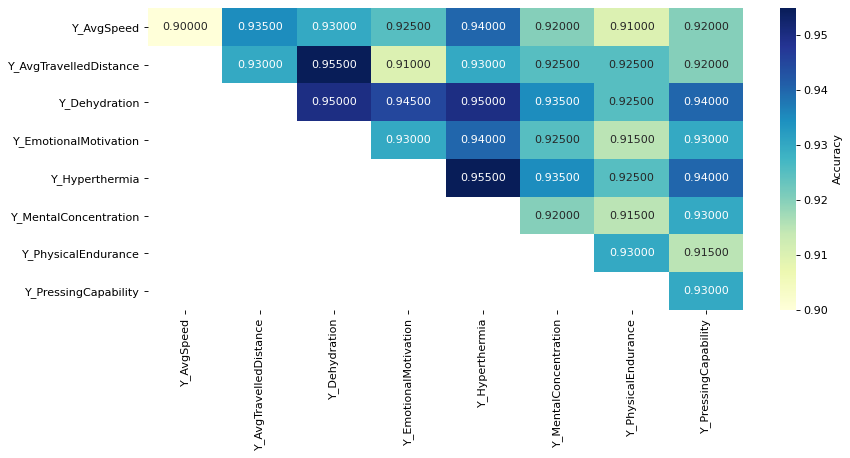

In [55]:
plt.figure(figsize=(12, 5), dpi=80)
utils_.plot_heatmap(df)

Perform best subset selection, specifying possible interactions or squared terms

In [83]:
from importlib import reload
reload(utils)

possible_interactions =  (
    ('Y_AvgTravelledDistance', 'Y_PhysicalEndurance'),
    ('Y_EmotionalMotivation',  'Y_PhysicalEndurance'),
    ('Y_Hyperthermia',         'Y_PhysicalEndurance'),
    ('Y_MentalConcentration',  'Y_Dehydration'),
)



100%|██████████| 4096/4096 [00:08<00:00, 471.08it/s]


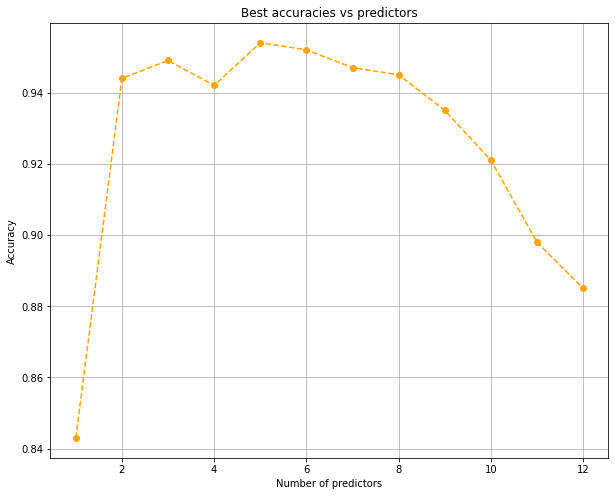

In [84]:
subsets = utils_.best_subset(df, possible_interactions, nfolds = 10, nCV = 5, verbose=True)

n_predictors = len(possible_interactions) + PREDICTORS_NUMBER

fig, ax = plt.subplots(figsize=(10,8))
utils.Utils.plot_best_subsets(subsets, n_predictors, ax)

In [59]:
utils_logistic = utils.Utils(ABS_PATH, DATASET_FILENAME, Y_LABEL, PREDICTORS_NUMBER)
df = utils_logistic.read_dataset()
subsets_logistic = utils_logistic.best_subset(df, possible_interactions, nfolds = 5, nCV = 5, verbose=True)

utils_gaussian = utils.Utils(ABS_PATH, DATASET_FILENAME, Y_LABEL, PREDICTORS_NUMBER, gaussian_classifier=True)
df = utils_gaussian.read_dataset()
subsets_gaussian = utils_gaussian.best_subset(df, possible_interactions, nfolds = 5, nCV = 5, verbose=True)

fig, ax = plt.subplots(figsize=(10,8))
n_predictors = len(possible_interactions) + PREDICTORS_NUMBER
utils.Utils.plot_best_subsets(subsets_logistic, n_predictors, ax, legend="Logistic regression")
utils.Utils.plot_best_subsets(subsets_gaussian, n_predictors, ax, color="blue", legend="GaussianNB")


100%|██████████| 4096/4096 [00:08<00:00, 473.07it/s]


TypeError: plot_best_subsets() missing 1 required positional argument: 'ax'

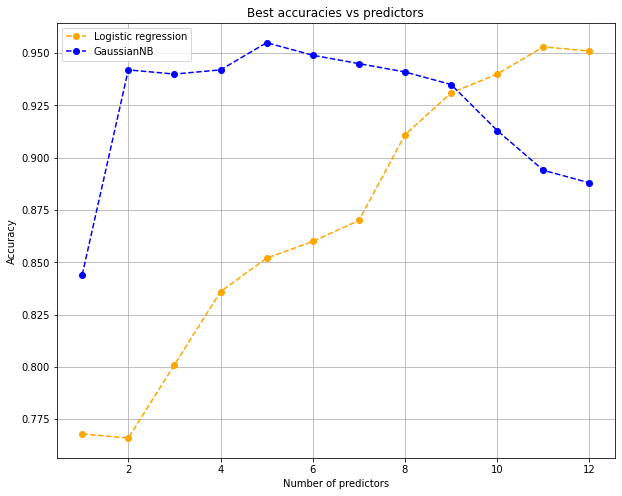

In [60]:
n_predictors = len(possible_interactions) + PREDICTORS_NUMBER
fig, ax = plt.subplots(figsize=(10,8))
utils.Utils.plot_best_subsets(subsets_logistic, n_predictors, ax, legend="Logistic regression")
utils.Utils.plot_best_subsets(subsets_gaussian, n_predictors, ax, color="blue", legend="GaussianNB")





In [62]:
subsets_gaussian['best_models'][5]['formula']

'Z_OppositeTeamDefence~Y_MentalConcentration+Y_Dehydration+Y_Hyperthermia+Y_EmotionalMotivation+Y_PhysicalEndurance'

In [11]:
utils_.save_model(subsets['best_models'][8])

In [74]:
df[['Y_MentalConcentration', 'Y_Dehydration', 'Y_Hyperthermia', 'Y_EmotionalMotivation', 'Y_PhysicalEndurance']].corr()


,Y_MentalConcentration,Y_Dehydration,Y_Hyperthermia,Y_EmotionalMotivation,Y_PhysicalEndurance
Y_MentalConcentration,1.000000,0.000379,0.039169,0.921574,0.508957
Y_Dehydration,0.000379,1.000000,0.895222,-0.001617,-0.393139
Y_Hyperthermia,0.039169,0.895222,1.000000,0.034293,-0.382372
Y_EmotionalMotivation,0.921574,-0.001617,0.034293,1.000000,0.405550
Y_PhysicalEndurance,0.508957,-0.393139,-0.382372,0.405550,1.000000


In [65]:
list(subsets_gaussian['best_models'][i]['formula'] for  i in subsets_gaussian['best_models'])

['Z_OppositeTeamDefence~Y_AvgSpeed',
 'Z_OppositeTeamDefence~Y_EmotionalMotivation+Y_AvgSpeed+Y_Dehydration',
 'Z_OppositeTeamDefence~Y_PressingCapability+Y_Dehydration',
 'Z_OppositeTeamDefence~Y_Hyperthermia+Y_MentalConcentration+Y_PressingCapability+Y_Dehydration',
 'Z_OppositeTeamDefence~Y_MentalConcentration+Y_Dehydration+Y_Hyperthermia+Y_EmotionalMotivation+Y_PhysicalEndurance',
 'Z_OppositeTeamDefence~Y_MentalConcentration+Y_MentalConcentration*Y_Dehydration+Y_Dehydration+Y_Hyperthermia+Y_EmotionalMotivation+Y_PhysicalEndurance',
 'Z_OppositeTeamDefence~Y_MentalConcentration*Y_Dehydration+Y_MentalConcentration+Y_Dehydration+Y_Hyperthermia+Y_AvgTravelledDistance+Y_EmotionalMotivation+Y_AvgSpeed',
 'Z_OppositeTeamDefence~Y_Hyperthermia*Y_PhysicalEndurance+Y_MentalConcentration*Y_Dehydration+Y_MentalConcentration+Y_Dehydration+Y_Hyperthermia+Y_EmotionalMotivation+Y_PressingCapability+Y_PhysicalEndurance',
 'Z_OppositeTeamDefence~Y_MentalConcentration*Y_Dehydration+Y_MentalConcentra